In [19]:
from sqlalchemy import create_engine
import os
from os import listdir
from os.path import isfile, join
from datetime import datetime
import pandas as pd
import numpy as np
import geopandas
from geobr import read_municipality
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; sns.set()

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

from settings import *

In [2]:
engine = create_engine(connection_uri)

In [3]:
sql = """
SELECT V.cod, V.vacina_dataaplicacao, V.total, 100000*V.total::NUMERIC/P.populacao::NUMERIC AS total_per100k FROM (
	(
		SELECT 0 AS cod, vacina_dataaplicacao, COUNT(*) AS total FROM public.vacinacao_limpa
		GROUP BY cod, vacina_dataaplicacao
		ORDER BY cod, vacina_dataaplicacao
	)
	UNION ALL 
	(
		SELECT SUBSTRING(estabelecimento_municipio_codigo::TEXT, 0, 3)::INTEGER AS cod, vacina_dataaplicacao, COUNT(*) AS total FROM public.vacinacao_limpa
		GROUP BY cod, vacina_dataaplicacao
		ORDER BY cod, vacina_dataaplicacao
	)
	UNION ALL (
		SELECT estabelecimento_municipio_codigo::INTEGER AS cod, vacina_dataaplicacao, COUNT(*) AS total FROM public.vacinacao_limpa
		GROUP BY cod, vacina_dataaplicacao
		ORDER BY cod, vacina_dataaplicacao
	)
) V JOIN populacao_total P ON (V.cod = P.cod)

;
"""

df_vac = pd.read_sql(sql, engine)

df_vac

cod vacina_dataaplicacao  total  total_per100k
0            0           1923-06-02      1       0.000472
1            0           1939-04-22      1       0.000472
2            0           1944-12-04      1       0.000472
3            0           1952-10-02      1       0.000472
4            0           1956-04-05      1       0.000472
...        ...                  ...    ...            ...
425534  530010           2021-05-25   5294     173.281238
425535  530010           2021-05-26   7576     247.974812
425536  530010           2021-05-27   6860     224.538967
425537  530010           2021-05-28   4767     156.031670
425538  530010           2021-05-29     81       2.651262

[425539 rows x 4 columns]

In [4]:
df_vac = df_vac[df_vac['vacina_dataaplicacao'] >= pd.to_datetime('2021-01-17').date()]

df_vac

cod vacina_dataaplicacao   total  total_per100k
39           0           2021-01-17     542       0.255955
40           0           2021-01-18    2107       0.995015
41           0           2021-01-19   59532      28.113530
42           0           2021-01-20  338559     159.881889
43           0           2021-01-21  378325     178.661077
...        ...                  ...     ...            ...
425534  530010           2021-05-25    5294     173.281238
425535  530010           2021-05-26    7576     247.974812
425536  530010           2021-05-27    6860     224.538967
425537  530010           2021-05-28    4767     156.031670
425538  530010           2021-05-29      81       2.651262

[425331 rows x 4 columns]

In [5]:
sql = """
SELECT * FROM municipios

;
"""

df_mun = pd.read_sql(sql, engine)

df_mun

codigo_ibge                         municipio  capital  codigo_uf        lat      lon  codmun               estado estado_sigla
0         5200050                   Abadia de Goiás        0         52 -16.757300 -49.4412  520005                Goiás           GO
1         5200100                         Abadiânia        0         52 -16.197000 -48.7057  520010                Goiás           GO
2         5200134                           Acreúna        0         52 -17.396000 -50.3749  520013                Goiás           GO
3         5200159                         Adelândia        0         52 -16.412700 -50.1657  520015                Goiás           GO
4         5200175                Água Fria de Goiás        0         52 -14.977800 -47.7823  520017                Goiás           GO
5         5200209                        Água Limpa        0         52 -18.077100 -48.7603  520020                Goiás           GO
6         5200258             Águas Lindas de Goiás        0         52 -15.761700 -48.2816  520025                Goiás           GO
7         5200308                          Alexânia        0         52 -16.083400 -48.5076  520030                Goiás           GO
8         5200506                          Aloândia        0         52 -17.729200 -49.4769  520050                Goiás           GO
9         5200555                    Alto Horizonte        0         52 -14.197800 -49.3378  520055                Goiás           GO
10        5200605             Alto Paraíso de Goiás        0         52 -14.130500 -47.5100  520060                Goiás           GO
11        5200803                 Alvorada do Norte        0         52 -14.479700 -46.4910  520080                Goiás           GO
12        5200829                         Amaralina        0         52 -13.923600 -49.2962  520082                Goiás           GO
13        5200852               Americano do Brasil        0         52 -16.251400 -49.9831  520085                Goiás           GO
14        5200902                      Amorinópolis        0         52 -16.615100 -51.0919  520090                Goiás           GO
15        5201108                          Anápolis        0         52 -16.328100 -48.9530  520110                Goiás           GO
16        5201207                        Anhanguera        0         52 -18.333900 -48.2204  520120                Goiás           GO
17        5201306                           Anicuns        0         52 -16.464200 -49.9617  520130                Goiás           GO
18        5201405              Aparecida de Goiânia        0         52 -16.819800 -49.2469  520140                Goiás           GO
19        5201454             Aparecida do Rio Doce        0         52 -18.294100 -51.1516  520145                Goiás           GO
20        5201504                             Aporé        0         52 -18.960700 -51.9232  520150                Goiás           GO
21        5201603                             Araçu        0         52 -16.356300 -49.6804  520160                Goiás           GO
22        5201702                         Aragarças        0         52 -15.895500 -52.2372  520170                Goiás           GO
23        5201801                        Aragoiânia        0         52 -16.908700 -49.4476  520180                Goiás           GO
24        5202155                         Araguapaz        0         52 -15.090900 -50.6315  520215                Goiás           GO
25        5202353                        Arenópolis        0         52 -16.383700 -51.5563  520235                Goiás           GO
26        5202502                            Aruanã        0         52 -14.916600 -51.0750  520250                Goiás           GO
27        5202601                        Aurilândia        0         52 -16.677300 -50.4641  520260                Goiás           GO
28        5202809                      Avelinópolis        0         52 -16.467200 -49.7579  520280                Goiás

In [53]:
import re

def processa_pergunta(pergunta):
    # todo: adicinonar tratamento de exceções e report de erros
    # toto: fazer parsing com ANTLR
    p = re.compile(r'\s*vacina[çc]?[ãa]?o?\s*em\s*(?P<mun>\w+(\s+\w+)*)\s*[\/\\_-]\s*(?P<est>\w+)\s*\?')
    m = p.findall(pergunta)
    if not m: return None
    print(m[0][0], m[0][1])
    mun = m[0][0]
    est = m[0][-1]
    return busca_municipio(mun, est)
    
def busca_municipio(mun, est):
    df_aux = pd.DataFrame()
    if len(est) == 2:
        df_aux = df_mun.query(f"municipio == '{mun}' and estado_sigla == '{est}'")
        if not len(df_aux): return None
    else: df_aux = df_mun.query(f"municipio == '{mun}' and estado == '{est}'")
    if not len(df_aux): return None
    return df_aux.iloc[0]
    
    

In [60]:
pergunta = '@dotocomoesta, como esta a vacinação em Curitiba A - PR ?'
p = re.compile(r'\s*vacina[çc]?[ãa]?o?\s*em\s*(?P<mun>\w+(\s+\w+)*)\s*[\/\\_-]\s*(?P<est>\w+)\s*\?')
m = p.findall(pergunta)

m


[('Curitiba A', ' A', 'PR')]

In [61]:
busca_municipio('São Paulo', 'SP')

codigo_ibge       3550308
municipio       São Paulo
capital                 1
codigo_uf              35
lat              -23.5329
lon              -46.6395
codmun             355030
estado          São Paulo
estado_sigla           SP
Name: 4694, dtype: object

In [67]:
pergunta = '@dotocomoesta, como esta a vacinação em São Paulo  - SP ?'

sr_mun = processa_pergunta(pergunta)
sr_mun

São Paulo  Paulo


codigo_ibge       3550308
municipio       São Paulo
capital                 1
codigo_uf              35
lat              -23.5329
lon              -46.6395
codmun             355030
estado          São Paulo
estado_sigla           SP
Name: 4694, dtype: object

In [68]:
df_resp_mun = df_vac.query(f"cod == {sr_mun['codmun']}").copy()

df_resp_mun['total_per100k'] = df_resp_mun['total_per100k'].rolling(7).mean()

df_resp_mun

cod vacina_dataaplicacao   total  total_per100k
300481  355030           2021-01-17     134            NaN
300482  355030           2021-01-18     828            NaN
300483  355030           2021-01-19    6933            NaN
300484  355030           2021-01-20   11404            NaN
300485  355030           2021-01-21   23395            NaN
300486  355030           2021-01-22   40089            NaN
300487  355030           2021-01-23    8337     105.613776
300488  355030           2021-01-24    2431     108.276142
300489  355030           2021-01-25    2104     109.755106
300490  355030           2021-01-26   11532     115.085634
300491  355030           2021-01-27   13802     117.865066
300492  355030           2021-01-28   23405     117.876657
300493  355030           2021-01-29   20255      94.887811
300494  355030           2021-01-30    1826      87.341155
300495  355030           2021-01-31     394      84.980145
300496  355030           2021-02-01   10779      95.035012
300497  355030           2021-02-02   12505      96.162780
300498  355030           2021-02-03   19646     102.936341
300499  355030           2021-02-04   24127     103.773184
300500  355030           2021-02-05   36828     122.982327
300501  355030           2021-02-06    6997     128.975839
300502  355030           2021-02-07    1842     130.654162
300503  355030           2021-02-08   21190     142.721162
300504  355030           2021-02-09   24868     157.050651
300505  355030           2021-02-10   16546     153.457558
300506  355030           2021-02-11   20645     149.421702
300507  355030           2021-02-12   63043     179.806526
300508  355030           2021-02-13    6877     179.667438
300509  355030           2021-02-14    7376     186.081690
300510  355030           2021-02-15   43711     212.184937
300511  355030           2021-02-16   35931     225.007645
300512  355030           2021-02-17   31061     241.831437
300513  355030           2021-02-18   31422     254.322654
300514  355030           2021-02-19   23657     208.671818
300515  355030           2021-02-20    2412     203.496604
300516  355030           2021-02-21     602     195.645115
300517  355030           2021-02-22   16374     163.959823
300518  355030           2021-02-23   14875     139.554603
300519  355030           2021-02-24   12215     117.710911
300520  355030           2021-02-25   10566      93.537503
300521  355030           2021-02-26   18267      87.290156
300522  355030           2021-02-27   38568     129.197220
300523  355030           2021-02-28    7794     137.533198
300524  355030           2021-03-01   70539     200.313818
300525  355030           2021-03-02   42170     231.950430
300526  355030           2021-03-03   93390     326.037328
300527  355030           2021-03-04   45870     366.956871
300528  355030           2021-03-05   47084     400.357575
300529  355030           2021-03-06    6412     363.086761
300530  355030           2021-03-07      31     354.088959
300531  355030           2021-03-08   26385     302.911713
300532  355030           2021-03-09   16453     273.104103
300533  355030           2021-03-10   19149     187.054143
300534  355030           2021-03-11   19382     156.352896
300535  355030           2021-03-12   23563     129.090587
300536  355030           2021-03-13    2378     124.414928
300537  355030           2021-03-14      73     124.463609
300538  355030           2021-03-15   79460     185.980852
300539  355030           2021-03-16   28056     199.429454
300540  355030           2021-03-17   18574     198.762993
300541  355030           2021-03-18   14887     193.553007
300542  355030           2021-03-19  135001     322.716614
300543  355030           2021-03-20   12141     334.032542
300544  355030           2021-03-21     226     334.209878
300545  355030           2021-03-22   36503     284.420030
300546  355030           2021-03-23   22978     278.534311
300547  355030           2021-03-24   48333     313.026852

In [69]:
df_resp_est = df_vac.query(f"cod == {sr_mun['codigo_uf']}").copy()

df_resp_est['total_per100k'] = df_resp_est['total_per100k'].rolling(7).mean()

df_resp_est

cod vacina_dataaplicacao   total  total_per100k
2754   35           2021-01-17     223            NaN
2755   35           2021-01-18    1041            NaN
2756   35           2021-01-19    8568            NaN
2757   35           2021-01-20   28346            NaN
2758   35           2021-01-21   84604            NaN
2759   35           2021-01-22  123019            NaN
2760   35           2021-01-23   28291      84.589683
2761   35           2021-01-24    9308      87.393476
2762   35           2021-01-25   50528     102.666047
2763   35           2021-01-26   51683     115.972106
2764   35           2021-01-27   66739     127.820871
2765   35           2021-01-28   94193     130.780207
2766   35           2021-01-29   79360     117.306261
2767   35           2021-01-30   18409     114.256499
2768   35           2021-01-31    3610     112.497995
2769   35           2021-02-01   49090     112.054202
2770   35           2021-02-02   58738     114.231501
2771   35           2021-02-03   77616     117.588338
2772   35           2021-02-04  112515     123.242834
2773   35           2021-02-05  100981     129.915460
2774   35           2021-02-06   33370     134.532692
2775   35           2021-02-07    9287     136.284715
2776   35           2021-02-08  103402     153.046368
2777   35           2021-02-09   79868     159.567463
2778   35           2021-02-10   72008     157.836734
2779   35           2021-02-11  136758     165.318557
2780   35           2021-02-12  191013     193.104039
2781   35           2021-02-13   37654     194.426157
2782   35           2021-02-14   14012     195.884377
2783   35           2021-02-15  127588     203.348608
2784   35           2021-02-16  102431     210.311952
2785   35           2021-02-17   92994     216.788607
2786   35           2021-02-18   93088     203.311265
2787   35           2021-02-19   67600     165.223811
2788   35           2021-02-20   10163     156.739598
2789   35           2021-02-21    1394     152.845458
2790   35           2021-02-22   43453     126.879895
2791   35           2021-02-23   36178     106.433037
2792   35           2021-02-24   31283      87.387921
2793   35           2021-02-25   28295      67.391645
2794   35           2021-02-26   44690      60.321210
2795   35           2021-02-27   90747      85.190870
2796   35           2021-02-28   17360      90.118263
2797   35           2021-03-01  210734     141.744165
2798   35           2021-03-02  180802     186.377713
2799   35           2021-03-03  251890     254.460970
2800   35           2021-03-04  140669     289.141592
2801   35           2021-03-05  130990     315.775312
2802   35           2021-03-06   66411     308.264788
2803   35           2021-03-07   10514     306.151990
2804   35           2021-03-08  111098     275.402543
2805   35           2021-03-09   92285     248.084617
2806   35           2021-03-10   82063     195.672973
2807   35           2021-03-11   84393     178.305196
2808   35           2021-03-12   89933     165.634273
2809   35           2021-03-13   44065     158.737898
2810   35           2021-03-14    7966     157.951540
2811   35           2021-03-15  200684     185.599378
2812   35           2021-03-16   98652     187.564348
2813   35           2021-03-17   72100     184.489589
2814   35           2021-03-18   85447     184.814872
2815   35           2021-03-19  307903     252.084304
2816   35           2021-03-20   97543     268.588569
2817   35           2021-03-21   11606     269.711938
2818   35           2021-03-22  138400     250.489984
2819   35           2021-03-23   94048     249.069108
2820   35           2021-03-24  145911     271.848499
2821   35           2021-03-25  147948     291.137423
2822   35           2021-03-26  286026     284.385791
2823   35           2021-03-27   97552     284.388568
2824   35           2021-03-28   10668     284.099085
2825   35           2021-03-29  161484     291.223219
2826   35           2021-03-30  106469     295.056561
2827   35 

In [70]:
df_resp_nac = df_vac.query(f"cod == 0").copy()

df_resp_nac['total_per100k'] = df_resp_nac['total_per100k'].rolling(7).mean()

df_resp_nac

cod vacina_dataaplicacao    total  total_per100k
39     0           2021-01-17      542            NaN
40     0           2021-01-18     2107            NaN
41     0           2021-01-19    59532            NaN
42     0           2021-01-20   338559            NaN
43     0           2021-01-21   378325            NaN
44     0           2021-01-22   336867            NaN
45     0           2021-01-23    81431      80.777926
46     0           2021-01-24    32682      82.946193
47     0           2021-01-25   218003      97.511226
48     0           2021-01-26   251525     110.463686
49     0           2021-01-27   295584     107.564456
50     0           2021-01-28   326176     104.046318
51     0           2021-01-29   289411     100.844785
52     0           2021-01-30    73718     100.324441
53     0           2021-01-31    33081     100.351359
54     0           2021-02-01   231842     101.284982
55     0           2021-02-02   264128     102.135220
56     0           2021-02-03   285337     101.443925
57     0           2021-02-04   321641     101.137980
58     0           2021-02-05   293599     101.420515
59     0           2021-02-06    89524     102.486839
60     0           2021-02-07    25767     101.993413
61     0           2021-02-08   269924     104.562546
62     0           2021-02-09   287432     106.134708
63     0           2021-02-10   344277     110.110989
64     0           2021-02-11   432773     117.608308
65     0           2021-02-12   474613     129.820089
66     0           2021-02-13   124666     132.190881
67     0           2021-02-14    37006     132.949100
68     0           2021-02-15   305538     135.351734
69     0           2021-02-16   292548     135.696875
70     0           2021-02-17   340727     135.457381
71     0           2021-02-18   391779     132.691795
72     0           2021-02-19   299946     120.908202
73     0           2021-02-20    54117     116.148742
74     0           2021-02-21    13700     114.576444
75     0           2021-02-22   221493     108.906501
76     0           2021-02-23   202501     102.831643
77     0           2021-02-24   177229      91.801546
78     0           2021-02-25   189948      78.185384
79     0           2021-02-26   285739      77.226934
80     0           2021-02-27   227282      88.909197
81     0           2021-02-28    56698      91.809979
82     0           2021-03-01   484348     109.543016
83     0           2021-03-02   502153     129.758495
84     0           2021-03-03   587651     157.446872
85     0           2021-03-04   497758     178.212717
86     0           2021-03-05   488758     191.909026
87     0           2021-03-06   220170     191.429228
88     0           2021-03-07    47258     190.792375
89     0           2021-03-08   421797     186.572485
90     0           2021-03-09   387049     178.807202
91     0           2021-03-10   424665     167.811647
92     0           2021-03-11   438704     163.827676
93     0           2021-03-12   449959     161.210172
94     0           2021-03-13   192551     159.346906
95     0           2021-03-14    37702     158.702227
96     0           2021-03-15   500167     163.989318
97     0           2021-03-16   405808     165.254860
98     0           2021-03-17   344309     159.833788
99     0           2021-03-18   417993     158.436557
100    0           2021-03-19   690824     174.686078
101    0           2021-03-20   361548     186.087155
102    0           2021-03-21    76459     188.701826
103    0           2021-03-22   630421     197.489176
104    0           2021-03-23   780097     222.739906
105    0           2021-03-24   964094     264.552578
106    0           2021-03-25   955928     300.843389
107    0           2021-03-26   988851     320.949241
108    0           2021-03-27   712070     344.596573
109    0           2021-03-28   216538     354.046749
110    0           2021-03-29   990362     378.329517
111    0           2021-03-30  1124314     401.551493
112    0 

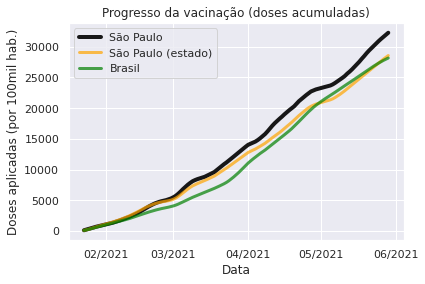

In [76]:


fig, ax = plt.subplots()

plt.plot(df_resp_mun['vacina_dataaplicacao'], df_resp_mun['total_per100k'].cumsum(), marker='', color='black', linewidth=4, alpha=0.9, label=sr_mun['municipio'])

plt.plot(df_resp_est['vacina_dataaplicacao'], df_resp_est['total_per100k'].cumsum(), marker='', color='orange', linewidth=3, alpha=0.7, label=sr_mun['estado'] + ' (estado)' if sr_mun['estado'] == sr_mun['municipio'] else sr_mun['estado'])

plt.plot(df_resp_nac['vacina_dataaplicacao'], df_resp_nac['total_per100k'].cumsum(), marker='', color='green', linewidth=3, alpha=0.7, label='Brasil')

# Major ticks every 1 months.
fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)


# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

plt.xlabel('Data')
plt.ylabel('Doses aplicadas (por 100mil hab.)')
plt.title('Progresso da vacinação (doses acumuladas)')

ax.legend()